# Neural Network - How to train a neural network on tabular data?


## 1 - Create the network architecture

Let us consider the toy dataset below. 

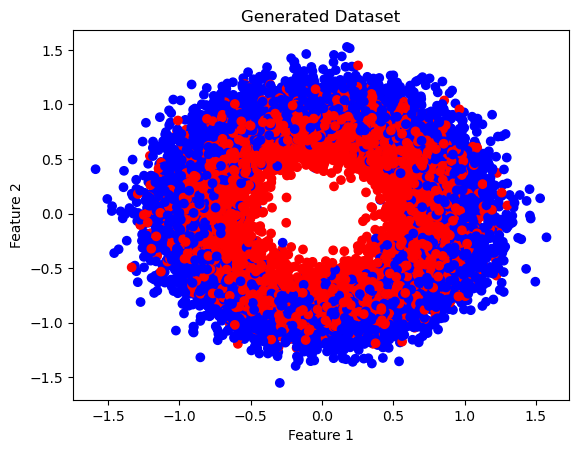

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate a classification dataset composed of two circles
X_train, y_train = make_circles(n_samples=10000, noise=0.17)
X_test, y_test = make_circles(n_samples=10000, noise=0.17)

# Plot the generated dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.show()

In [5]:
import pandas as pd
import torch
from torch import nn

# Create a DataFrame from the array
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

#Create training data
x_data = torch.tensor(df_train.values, dtype=torch.float32)
y_data = torch.tensor(y_train, dtype=torch.float32)

#Create test data
x_data_test = torch.tensor(df_test.values, dtype=torch.float32)
y_data_test = torch.tensor(y_test, dtype=torch.float32)

type(x_data), type(y_data)

(torch.Tensor, torch.Tensor)

**1) Split the training set into a new training set and a validation set (80%/20%). The validation set will be used to train the network, whereas the test set will only be used in the end to evaluate the performance of our network.** 

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

**2) What is the size of all the objects you have created at the previous question?**

In [7]:
# You can print the shape of an object with the .shape command

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_valid:', x_valid.shape)
print('y_valid:', y_valid.shape)

#This was expected: the inputs are of size two, the output is of size one. 
# We have 80% / 20% of the initial data divided into x_train/x_valid and y_train/y_valid

x_train: torch.Size([8000, 2])
y_train: torch.Size([8000])
x_valid: torch.Size([2000, 2])
y_valid: torch.Size([2000])


**3) By looking at the documentation below, define a 'NeuralNetwork' class for a network architecture composed of two hidden layers (64 neurons per layer, sigmoid activation function) and an output layer.**

 https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html 

In [8]:
input_dim = 2
hidden_dim = 64
output_dim = 1


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Define the layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid2 = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid2(out)
        return out
  

**4) You have just created the class but no networks have been created. Instantiate the class by creating one network that belongs to it.** 

In [9]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid2): Sigmoid()
)


**5) Compute the prediction of the network for the first ten observations in the test set. Beware, since you manipulate tensors, operations (even the most elementary ones) must be done through 'torch' environment and not 'numpy' environment.** 

In [10]:
result = model(x_train[0:10,:])
result = torch.reshape(result, (-1,))

print("The estimated probabilities output by the network for the first ten observations are", result)

print("The corresponding predictions are", 1*(result>1/2))

print("The corresponding lavels are", y_train[0:10])

torch.eq(y_train[0:10], 1*(result>1/2))


print("The resulting accuracy for the first ten observations is " , torch.sum(torch.eq(y_train[0:10], 1*(result>1/2)))/10 )

The estimated probabilities output by the network for the first ten observations are tensor([0.5139, 0.5214, 0.5180, 0.5162, 0.5160, 0.5145, 0.5163, 0.5226, 0.5231,
        0.5183], grad_fn=<ReshapeAliasBackward0>)
The corresponding predictions are tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
The corresponding lavels are tensor([0., 1., 1., 0., 1., 0., 1., 1., 0., 1.])
The resulting accuracy for the first ten observations is  tensor(0.6000)


**6) Discuss the error of the network.**

In [ ]:
# The error of the network is quite high, which is quite logical since the network has not seen any data. 
# Indeed, in the code above, the class NeuralNetwork does not contain any observations from the dataset.
# Besides, we have not specified the training procedure of the network. 
# In conclusion, the network has not been trained. 
# The prediction we obtain here results from the random weight initialization and is thus inaccurate. 

## 2 - Train the network architecture

In order to train the network, we need to define a loss and an optimizer. This is done in the following code. 

In [11]:
criterion = torch.nn.CrossEntropyLoss()
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

**7) Why do we use the cross-entropy loss? Why do we need to specify model.parameters?**

**Answer** The cross-entropy loss is the most adapted loss to a classification problem. We need to specify the set of trainable parameters that will be optimized via the optimization procedure. With the above command, we impose that all parameters of the network will be trained during the optimization steps. 

**8) Use the following code to train the network. Make sure to understand each line.**

In [13]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

#Initialize the model 

model = NeuralNetwork()

# Hyperparameters
num_epochs = 100
batch_size = 32

# Create TensorDataset and DataLoader for training data
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#Store the values at each epoch in the following objects
epoch_count, train_loss_values, valid_loss_values, train_acc_values, valid_acc_values = [], [], [], [], []

# Training loop
for epoch in range(num_epochs):
    train_loss_values_temp = []
    train_acc_values_temp = []

    for inputs, targets in train_dataloader:
        # Forward pass - compute the predictions
        outputs = model(inputs)
        outputs = outputs.squeeze()
        
        #Compute the loss used for the optimization
        loss = criterion(outputs, targets)
        
        #Compute the accuracy, used for monitoring the model through epochs.
        acc = accuracy_fn(targets>1/2, outputs>1/2)
        
        train_loss_values_temp.append(loss.detach().numpy()/len(targets))
        train_acc_values_temp.append(acc)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss after every epoch
    #print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

    # Put the model in evaluation mode
    model.eval() 

    with torch.inference_mode():
        
        #Compute the predictions on the validation set
        output_valid = model(x_valid)   
        output_valid = output_valid.squeeze()
        
        # Compute the loss and the accuracy on the validation set
        valid_loss = criterion(output_valid, y_valid)
        valid_acc = accuracy_fn(y_valid>1/2, output_valid>1/2)    

    # Print the loss and the accuracy on the training set and validation set for each epoch
    
    print(f'Epoch: {epoch:4.0f} | Train Loss: {np.mean(train_loss_values_temp):.5f}, Accuracy: {np.mean(train_acc_values_temp):.2f}% | Validation Loss: {valid_loss/len(y_valid):.5f}, Accuracy: {valid_acc:.2f}%')
    valid_acc_values.append(valid_acc)
    valid_loss_values.append(valid_loss.detach().numpy()/ len(y_valid))
    train_acc_values.append(np.mean(train_acc_values_temp))
    train_loss_values.append(np.mean(train_loss_values_temp))



Epoch:    0 | Train Loss: 1.73153, Accuracy: 50.04% | Validation Loss: 3.81191, Accuracy: 49.85%
Epoch:    1 | Train Loss: 1.73151, Accuracy: 49.35% | Validation Loss: 3.81184, Accuracy: 49.70%
Epoch:    2 | Train Loss: 1.73147, Accuracy: 47.56% | Validation Loss: 3.81180, Accuracy: 48.20%
Epoch:    3 | Train Loss: 1.73142, Accuracy: 51.86% | Validation Loss: 3.81176, Accuracy: 51.30%
Epoch:    4 | Train Loss: 1.73140, Accuracy: 54.60% | Validation Loss: 3.81172, Accuracy: 52.75%
Epoch:    5 | Train Loss: 1.73136, Accuracy: 51.16% | Validation Loss: 3.81169, Accuracy: 50.15%
Epoch:    6 | Train Loss: 1.73133, Accuracy: 49.96% | Validation Loss: 3.81163, Accuracy: 50.15%
Epoch:    7 | Train Loss: 1.73127, Accuracy: 49.96% | Validation Loss: 3.81162, Accuracy: 50.15%
Epoch:    8 | Train Loss: 1.73122, Accuracy: 49.96% | Validation Loss: 3.81154, Accuracy: 50.15%
Epoch:    9 | Train Loss: 1.73117, Accuracy: 49.96% | Validation Loss: 3.81153, Accuracy: 50.15%
Epoch:   10 | Train Loss: 1.73

Epoch:   86 | Train Loss: 1.68097, Accuracy: 71.62% | Validation Loss: 3.75932, Accuracy: 72.35%
Epoch:   87 | Train Loss: 1.68051, Accuracy: 71.58% | Validation Loss: 3.75903, Accuracy: 72.70%
Epoch:   88 | Train Loss: 1.68072, Accuracy: 71.75% | Validation Loss: 3.75884, Accuracy: 72.80%
Epoch:   89 | Train Loss: 1.68034, Accuracy: 71.80% | Validation Loss: 3.75884, Accuracy: 72.75%
Epoch:   90 | Train Loss: 1.68089, Accuracy: 71.65% | Validation Loss: 3.75850, Accuracy: 72.80%
Epoch:   91 | Train Loss: 1.67978, Accuracy: 71.69% | Validation Loss: 3.75819, Accuracy: 72.65%
Epoch:   92 | Train Loss: 1.67995, Accuracy: 71.69% | Validation Loss: 3.75804, Accuracy: 72.65%
Epoch:   93 | Train Loss: 1.67894, Accuracy: 71.72% | Validation Loss: 3.75849, Accuracy: 72.50%
Epoch:   94 | Train Loss: 1.67907, Accuracy: 71.70% | Validation Loss: 3.75749, Accuracy: 72.95%
Epoch:   95 | Train Loss: 1.67879, Accuracy: 71.79% | Validation Loss: 3.75752, Accuracy: 72.35%
Epoch:   96 | Train Loss: 1.67

**9) Plot the evolution of the training and validation accuracy as a function of the number of epochs. Comment.**

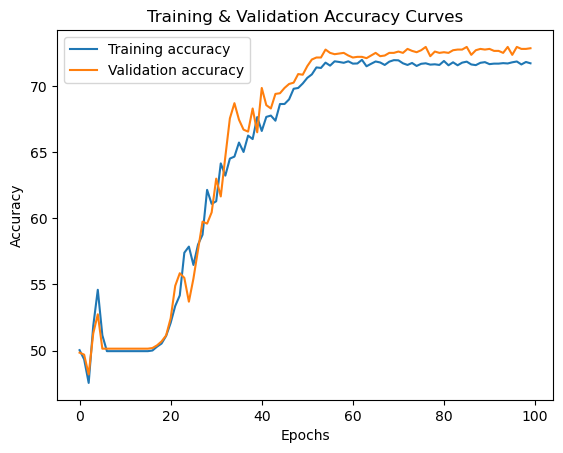

In [14]:
plt.plot(np.arange(num_epochs), train_acc_values, label='Training accuracy')
plt.plot(np.arange(num_epochs), valid_acc_values, label='Validation accuracy')
plt.title('Training & Validation Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# The accuracy curves seem to reach a plateau, 
# which indicates that increasing the number of epochs would not be beneficial to the model. 

**10) Evaluate the performance of the final neural network on the test set.**

In [160]:
predictions = model(x_data_test)  # Predictions for test data
predictions = predictions.squeeze()
acc = accuracy_fn(y_data_test>1/2, predictions>1/2)

print("The accuracy of the final neural network is:", acc)

#This seems to be of the same magnitude as the error obtained on the validation set during the training. 

The accuracy of the final neural network is: 72.0
